> *Alberto Ferrari* - [github](https://albertoferrari.github.io/)

![Pandas](pandas.png)

### importazione libreria

In [1]:
import pandas as pd

## Series

![Series](series.svg)

#### creazione Series

In [2]:
# lista dati e index
raggioPianeti = pd.Series([6371,3389.5,6051.8,69911], index=['terra','marte','venere','giove'])
print(raggioPianeti)

terra      6371.0
marte      3389.5
venere     6051.8
giove     69911.0
dtype: float64


In [3]:
# dizionario <indice>: <valore>
distanzaSole = pd.Series({'terra': 149.6, 'marte': 227.9, 'venere': 108.2})
print(distanzaSole)

terra     149.6
marte     227.9
venere    108.2
dtype: float64


In [4]:
# dati (indice numerico)
valori = pd.Series([5.5,3.8,2.7,5.8])
print(valori)

0    5.5
1    3.8
2    2.7
3    5.8
dtype: float64


#### accesso ai dati

In [5]:
print('raggio di Marte',raggioPianeti['marte'])
print('distanze dal Sole:')
print(distanzaSole[1:3])
print('raggio dei pianeti:')
print(raggioPianeti['terra':'venere'])

raggio di Marte 3389.5
distanze dal Sole:
marte     227.9
venere    108.2
dtype: float64
raggio dei pianeti:
terra     6371.0
marte     3389.5
venere    6051.8
dtype: float64


#### operazioni sulle Series

In [6]:
# modifica di un valore
print(valori)
valori[2] *= 10
print(valori)

0    5.5
1    3.8
2    2.7
3    5.8
dtype: float64
0     5.5
1     3.8
2    27.0
3     5.8
dtype: float64


In [7]:
# modifica di tutti i valori
distanzaSole = distanzaSole * 1000000
print(distanzaSole)

terra     149600000.0
marte     227900000.0
venere    108200000.0
dtype: float64


In [8]:
# distanti dal sole più della terra?
dt = distanzaSole['terra']
print(distanzaSole > dt)

terra     False
marte      True
venere    False
dtype: bool


In [9]:
# pianeti più piccoli della terra
rt = raggioPianeti['terra']
print(raggioPianeti[raggioPianeti < rt])

marte     3389.5
venere    6051.8
dtype: float64


#### statistiche su Series

In [10]:
print(valori)
print('somma: ',valori.sum())
print('prodotto: ',valori.product())

0     5.5
1     3.8
2    27.0
3     5.8
dtype: float64
somma:  42.099999999999994
prodotto:  3272.9399999999996


In [11]:
print('raggio del pianeta più piccolo: ',raggioPianeti.min())
print('nome del pianeta più grande: ',raggioPianeti.idxmax())

raggio del pianeta più piccolo:  3389.5
nome del pianeta più grande:  giove


## DataFrame

![DataFrame](dataframe.png)

#### creazione DataFrame

In [12]:
# da dizionario
dati = {'raggio' : [6371,3389.5,6051.8], 'distanza' : [149.6, 227.9, 108.2]}
pianeti = pd.DataFrame(dati, index=['terra','marte','venere'])
print(pianeti)

        raggio  distanza
terra   6371.0     149.6
marte   3389.5     227.9
venere  6051.8     108.2


In [13]:
# lista di tuple e lista per indice
pianetiBis = pd.DataFrame([('terra', 6371, 149.6),
                           ('marte', 3389.5, 227.9),
                           ('venere', 6051.8, 108.2)],
                    columns=['pianeta','raggio', 'distanza'])
pianetiBis.set_index('pianeta', inplace=True)
print(pianetiBis)

         raggio  distanza
pianeta                  
terra    6371.0     149.6
marte    3389.5     227.9
venere   6051.8     108.2


### DataFrame da file csv

In [14]:
# la prima riga del file contiene il nome delle colonne
iris = pd.read_csv("iris.csv")

In [15]:
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [16]:
print(iris)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [17]:
# nel file (iris_no_names.csv) non è presente la riga con i nomi delle colonne
iris = pd.read_csv("iris_no_names.csv", 
                   header=None, 
                   names=["lung.sepalo","larg.sepalo","lung.petalo","larg.petalo","specie"])

In [18]:
print(iris)

     lung.sepalo  larg.sepalo  lung.petalo  larg.petalo     specie
0            5.1          3.5          1.4          0.2     Setosa
1            4.9          3.0          1.4          0.2     Setosa
2            4.7          3.2          1.3          0.2     Setosa
3            4.6          3.1          1.5          0.2     Setosa
4            5.0          3.6          1.4          0.2     Setosa
..           ...          ...          ...          ...        ...
145          6.7          3.0          5.2          2.3  Virginica
146          6.3          2.5          5.0          1.9  Virginica
147          6.5          3.0          5.2          2.0  Virginica
148          6.2          3.4          5.4          2.3  Virginica
149          5.9          3.0          5.1          1.8  Virginica

[150 rows x 5 columns]


In [19]:
# primo dato
print(iris.loc[0])

lung.sepalo       5.1
larg.sepalo       3.5
lung.petalo       1.4
larg.petalo       0.2
specie         Setosa
Name: 0, dtype: object


In [20]:
# informazioni dei dati 3,10,22
print(iris.loc[[3,10,22]])

    lung.sepalo  larg.sepalo  lung.petalo  larg.petalo  specie
3           4.6          3.1          1.5          0.2  Setosa
10          5.4          3.7          1.5          0.2  Setosa
22          4.6          3.6          1.0          0.2  Setosa


In [21]:
# dati di marte
print(pianeti.loc['marte'])

raggio      3389.5
distanza     227.9
Name: marte, dtype: float64


In [22]:
# nomi delle colonne
iris.columns

Index(['lung.sepalo', 'larg.sepalo', 'lung.petalo', 'larg.petalo', 'specie'], dtype='object')

In [23]:
# informazioni
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lung.sepalo  150 non-null    float64
 1   larg.sepalo  150 non-null    float64
 2   lung.petalo  150 non-null    float64
 3   larg.petalo  150 non-null    float64
 4   specie       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [24]:
# accesso a un dato del DataFrame 
# [colonna][riga]
print(pianeti)
print('------------------------')
print('raggio della terra: ',pianeti['raggio']['terra'])
dt = pianeti['distanza']['terra']
print('------------------------')
print('pianeti più distanti della terra dal sole')
print(pianeti[pianeti['distanza'] > dt])

        raggio  distanza
terra   6371.0     149.6
marte   3389.5     227.9
venere  6051.8     108.2
------------------------
raggio della terra:  6371.0
------------------------
pianeti più distanti della terra dal sole
       raggio  distanza
marte  3389.5     227.9


In [25]:
# media 
print(pianeti.mean())
# tutte le informazioni
pianeti.describe()

raggio      5270.766667
distanza     161.900000
dtype: float64


raggio    distanza
count     3.000000    3.000000
mean   5270.766667  161.900000
std    1637.023324   60.790542
min    3389.500000  108.200000
25%    4720.650000  128.900000
50%    6051.800000  149.600000
75%    6211.400000  188.750000
max    6371.000000  227.900000

#### estrazione di una Series da un DataFrame

In [26]:
y = iris["specie"]
print(type(y))
print(y)

<class 'pandas.core.series.Series'>
0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: specie, Length: 150, dtype: object


#### eliminazione di una Series (colonna) da un DataFrame

In [27]:
X = iris.drop("specie",axis=1)
print(X)

     lung.sepalo  larg.sepalo  lung.petalo  larg.petalo
0            5.1          3.5          1.4          0.2
1            4.9          3.0          1.4          0.2
2            4.7          3.2          1.3          0.2
3            4.6          3.1          1.5          0.2
4            5.0          3.6          1.4          0.2
..           ...          ...          ...          ...
145          6.7          3.0          5.2          2.3
146          6.3          2.5          5.0          1.9
147          6.5          3.0          5.2          2.0
148          6.2          3.4          5.4          2.3
149          5.9          3.0          5.1          1.8

[150 rows x 4 columns]


#### estrazione di un DataFrame da un DataFrame

In [28]:
X = iris[['lung.petalo', 'larg.petalo']]
print(type(X))
print(X)

<class 'pandas.core.frame.DataFrame'>
     lung.petalo  larg.petalo
0            1.4          0.2
1            1.4          0.2
2            1.3          0.2
3            1.5          0.2
4            1.4          0.2
..           ...          ...
145          5.2          2.3
146          5.0          1.9
147          5.2          2.0
148          5.4          2.3
149          5.1          1.8

[150 rows x 2 columns]


In [29]:
Z = X.copy()              # copia DataFrame
Z = Z.sample(frac=1)      # mescola colonne
Z

lung.petalo  larg.petalo
81           3.7          1.0
40           1.3          0.3
63           4.7          1.4
24           1.9          0.2
93           3.3          1.0
..           ...          ...
129          5.8          1.6
90           4.4          1.2
125          6.0          1.8
59           3.9          1.4
2            1.3          0.2

[150 rows x 2 columns]

In [30]:
print(Z.loc[0])               # indice 0
print(Z.iloc[0])              # posizione 0

lung.petalo    1.4
larg.petalo    0.2
Name: 0, dtype: float64
lung.petalo    3.7
larg.petalo    1.0
Name: 81, dtype: float64


In [31]:
print("lunghezza petalo dell'elemento di indice 0",Z.loc[0]["lung.petalo"])                  # indice 0
print("larghezza petalo dell'elementi in posizione 0",Z.iloc[0]["larg.petalo"])              # posizione 0

lunghezza petalo dell'elemento di indice 0 1.4
larghezza petalo dell'elementi in posizione 0 1.0


#### informazioni associate a un DataFrame

In [32]:
iris.describe()

lung.sepalo  larg.sepalo  lung.petalo  larg.petalo
count   150.000000   150.000000   150.000000   150.000000
mean      5.843333     3.057333     3.758000     1.199333
std       0.828066     0.435866     1.765298     0.762238
min       4.300000     2.000000     1.000000     0.100000
25%       5.100000     2.800000     1.600000     0.300000
50%       5.800000     3.000000     4.350000     1.300000
75%       6.400000     3.300000     5.100000     1.800000
max       7.900000     4.400000     6.900000     2.500000

##### DataFrame.count
- Count number of non-NA/null observations

##### DataFrame.max
- Maximum of the values in the object

##### DataFrame.min
- Minimum of the values in the object

##### DataFrame.mean
- Mean of the values

##### DataFrame.std
- Standard deviation of the observations

In [33]:
iris["larg.sepalo"].max()

4.4

#### maschera

In [34]:
# seleziona righe con lunghezza petalo superiore alla media
maschera = iris["lung.petalo"] > iris["lung.petalo"].mean()
print(type(maschera))
print(maschera)

<class 'pandas.core.series.Series'>
0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: lung.petalo, Length: 150, dtype: bool


In [35]:
# specie con lunghezza petalo superiore alla media
print(iris[maschera]["specie"])

50     Versicolor
51     Versicolor
52     Versicolor
53     Versicolor
54     Versicolor
          ...    
145     Virginica
146     Virginica
147     Virginica
148     Virginica
149     Virginica
Name: specie, Length: 93, dtype: object


In [36]:
iris_test = iris.copy()                                  # copia
masc_versicolor = iris_test["specie"] == "Versicolor"    # selezione specie "Versicolor"
iris_test[masc_versicolor] = "Bandiera blu"              # modifica 
print(iris_test["specie"].unique())                      # senza ripetizioni

['Setosa' 'Bandiera blu' 'Virginica']


#### Normalizzazione
i dati vengono ridimensionati su un intervallo fisso, in genere da 0 a 1
nell'esempio l'intervallo è [0,1]

In [37]:
print(X)   
X_normalizzato = (X-X.min())/(X.max()-X.min())
print(X_normalizzato)

     lung.petalo  larg.petalo
0            1.4          0.2
1            1.4          0.2
2            1.3          0.2
3            1.5          0.2
4            1.4          0.2
..           ...          ...
145          5.2          2.3
146          5.0          1.9
147          5.2          2.0
148          5.4          2.3
149          5.1          1.8

[150 rows x 2 columns]
     lung.petalo  larg.petalo
0       0.067797     0.041667
1       0.067797     0.041667
2       0.050847     0.041667
3       0.084746     0.041667
4       0.067797     0.041667
..           ...          ...
145     0.711864     0.916667
146     0.677966     0.750000
147     0.711864     0.791667
148     0.745763     0.916667
149     0.694915     0.708333

[150 rows x 2 columns]


In [38]:
iris.sort_values("lung.petalo")           # ordinamento - non modifica

lung.sepalo  larg.sepalo  lung.petalo  larg.petalo     specie
22           4.6          3.6          1.0          0.2     Setosa
13           4.3          3.0          1.1          0.1     Setosa
14           5.8          4.0          1.2          0.2     Setosa
35           5.0          3.2          1.2          0.2     Setosa
36           5.5          3.5          1.3          0.2     Setosa
..           ...          ...          ...          ...        ...
131          7.9          3.8          6.4          2.0  Virginica
105          7.6          3.0          6.6          2.1  Virginica
117          7.7          3.8          6.7          2.2  Virginica
122          7.7          2.8          6.7          2.0  Virginica
118          7.7          2.6          6.9          2.3  Virginica

[150 rows x 5 columns]

### raggruppamento

In [39]:
raggruppamento  = iris.groupby("specie")
print("valori medi")
print(raggruppamento.mean())
print()
print("valori massimi")
print(raggruppamento.max())

valori medi
            lung.sepalo  larg.sepalo  lung.petalo  larg.petalo
specie                                                        
Setosa            5.006        3.428        1.462        0.246
Versicolor        5.936        2.770        4.260        1.326
Virginica         6.588        2.974        5.552        2.026

valori massimi
            lung.sepalo  larg.sepalo  lung.petalo  larg.petalo
specie                                                        
Setosa              5.8          4.4          1.9          0.6
Versicolor          7.0          3.4          5.1          1.8
Virginica           7.9          3.8          6.9          2.5


## plot

<AxesSubplot:xlabel='lung.petalo', ylabel='larg.petalo'>

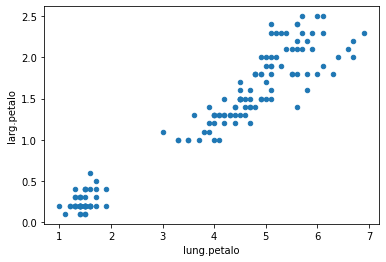

In [40]:
import matplotlib.pyplot as plt
iris.plot(x="lung.petalo",y="larg.petalo",kind="scatter")